# MovieLens Recommendation System


GROUP 9 MEMBERS:

*   PEGGY OBAM
*   IVY KEMUNTO
*   JARED BII
*   JOY KAMAU
*  IMMANUEL OMONDI



![Movie Time](Recommendation.png)

# BUSINESS UNDERSTANDING

In the dynamic landscape of the entertainment industry, user engagement is paramount for platforms like ours. With a plethora of entertainment choices available and rising user expectations, captivating and retaining our audience has never been more vital. Engaging users not only sustains revenue streams but also curbs the costs linked with acquiring new subscribers.

To effectively address user engagement, we must delve into the intricacies that shape it. By delving into users' historical interactions and preferences, we unearth valuable insights into their viewing habits, favored genres, and preferred content consumption times. Armed with this intelligence, our goal is to create a cutting-edge movie recommendation system that significantly enhances user engagement by delivering personalized movie suggestions. We aim to address the challenge of assisting users in discovering movies that align closely with their preferences and maximizing their satisfaction.

Employing a proactive strategy to enhance user engagement allows us to maintain revenue streams while simultaneously elevating user satisfaction. This strategy fosters user loyalty, driving the overall success of our platform. It goes beyond immediate challenges, investing in the platform's long-term growth and prosperity. Embracing this approach, we can adeptly navigate the dynamics of user engagement, optimize content consumption, and establish a competitive edge in the entertainment market

Stakeholder: **Cinematic**

## Problem Statement:

To achieve this objective, we seek to build an advanced recommendation system that provides users with top 5 movie recommendations based on their historical movie ratings and interactions. This personalized recommendation approach utilizes collaborative filtering as its primary mechanism, leveraging user behavior patterns to make accurate predictions.

### Challenges and Goals:

**Collaborative Filtering:** Implement a collaborative filtering algorithm that accurately predicts movie ratings for users based on their historical ratings of other movies.

**Personalization:** Tailor the recommendations to each user's preferences, ensuring that the suggested movies align with their past interactions and ratings.

**User Engagement:** Focus on enhancing user engagement by delivering relevant and appealing movie suggestions, which in turn prolongs user interactions with the platform.

**Addressing Cold Start Problem:** If resources permit, consider implementing a hybrid approach, integrating collaborative filtering as the core technique and incorporating content-based filtering to handle the "cold start" problem for new users who have limited rating history.


# Data understanding

The MovieLens dataset from the University of Minnesota serves as the foundation for this recommendation system. The dataset consists of three main components: movies, ratings, and links. These components provide comprehensive information about user interactions and preferences within the movie platform.

**Movies Dataset:**

The movies dataset includes information about each movie, such as movie ID, title, and genres.
This dataset helps enrich the recommendations by providing details about the movies themselves.

Size: The dataset contains information about a collection of movies. Each movie is represented by a row in the dataset.

Columns:
- **movieId:** A unique identifier for each movie. This ID is used to connect the movie information with the ratings and links datasets. This identifier is crucial for linking the movie information with other datasets, especially the ratings dataset. It acts as a key to connect the movie information with user interactions (ratings) and potentially external databases (links).
- **title:** The title of the movie.The title of the movie provides its name, which is essential for users to recognize and understand which movie is being referred to.
- **genres:** A list of genres associated with the movie. The genres associated with the movie categorize it into different thematic categories. Genres help users understand the content and style of the movie. For example, genres could include "Action," "Comedy," "Drama," "Science Fiction," etc

**Ratings Dataset:**

The ratings dataset contains user-movie interactions, including user IDs, movie IDs, and ratings.
Collaborative filtering algorithms will leverage this dataset to predict movie ratings for users based on their historical ratings.

Size: The dataset contains information about user-movie interactions, where each row represents a user's rating for a specific movie.

Columns:

- **userId:** A unique identifier for each user. This identifier is used to distinguish between different users. It helps track individual user interactions and preferences.
- **movieId:** A unique identifier for each movie. This identifier connects the ratings with specific movies. It links user ratings to the movies they've interacted with.
- **rating:** The rating given by the user to the movie. The rating provided by the user for a specific movie. Ratings are typically represented on a numerical scale, such as 1 to 5 stars. Ratings represent how much a user liked or enjoyed a movie
- **timestamp:** A timestamp indicating when the rating was given. This timestamp indicates when the user provided the rating. While not always used directly in the recommendation process, it can be used for analyzing temporal patterns in user behavior.

**Links Dataset:**

The links dataset comprises links between movie IDs in the MovieLens dataset and external movie databases.
This dataset might offer additional contextual information for content-based filtering, especially for new users.

Size: The dataset contains information that links movie IDs from the MovieLens dataset to external movie databases or resources.

Columns:

- **movieId:** A unique identifier for each movie. This identifier corresponds to the movie ID in the MovieLens dataset. It links the movie information with external databases.
- **imdbId:** The identifier of the movie in the IMDb (Internet Movie Database) system. This identifier is used to connect the movie with its corresponding entry in the IMDb database. IMDb is a widely-used database for movie information, including details about cast, crew, plot, and more.
- **tmdbId:** The identifier of the movie in the TMDB (The Movie Database) system. This identifier links the movie to its corresponding entry in the TMDB database. TMDB is another popular movie database that provides information about movies, including images, trailers, and more.

## Assumptions

1. **User Preferences are Stable.** It's assumed that users' preferences for movies remain relatively stable over time. This assumption might not hold true if user preferences change significantly due to factors like life events or evolving tastes.

2. **Users who have rated movies are likely to have seen those movies.** This is a reasonable assumption, as it is unlikely that a user would rate a movie that they have not seen.
3. **Users who rate movies consistently are likely to rate similar movies similarly.** This means that if a user likes one movie, they are more likely to like other similar movies.
4. **Users' ratings of movies are influenced by a variety of factors, such as the movie's genre, release date, and other factors.** This assumption is important to consider when building a movie recommendation system, as it ensures that the recommendations generated are relevant to the user's interests.
5. **The Movielens dataset is a representative sample of the population of movie watchers.** This assumption is important, as it ensures that the recommendations generated by the system are relevant to the target audience.




In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


## Importing relevant libraries

In [3]:
import seaborn as sns
import matplotlib.cm as cm
import math
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import surprise
from surprise import Reader, Dataset, SVD
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from surprise import Reader
from sklearn.neighbors import NearestNeighbors


import warnings
warnings.filterwarnings('ignore')

## First Dataset : Links

In [4]:
links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
links.shape

(9742, 3)

In [6]:
links.isna().any()

movieId    False
imdbId     False
tmdbId      True
dtype: bool

## Second Dataset : Ratings

In [7]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
ratings.shape

(100836, 4)

In [9]:
ratings.isna().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

## Third Dataset : Movies

In [10]:
movies = pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Updating the genre column to keep only the first word
 By doing this, the visualizations will be more readable

In [11]:
# Update the 'genre' column to keep only the first word
movies['genres'] = movies['genres'].str.split("|").str[0]

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
movies.shape

(9742, 3)

In [13]:
movies.isna().any()

movieId    False
title      False
genres     False
dtype: bool

### Checking to see what genres are popular

In [14]:
# Get a census of the genre keywords
genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the frequency of the genre
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census:
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):
        if type(census_keywords) == float and pd.isnull(census_keywords):
            continue
        for s in [s for s in census_keywords if s in census]:
            if pd.notnull(s):
                keyword_count[s] += 1

    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Comedy', 2779],
 ['Drama', 2226],
 ['Action', 1828],
 ['Adventure', 653],
 ['Crime', 537]]

The top 5 genres are, in that respect order: Drama, Comedy, Action, Thriller, and Romance.

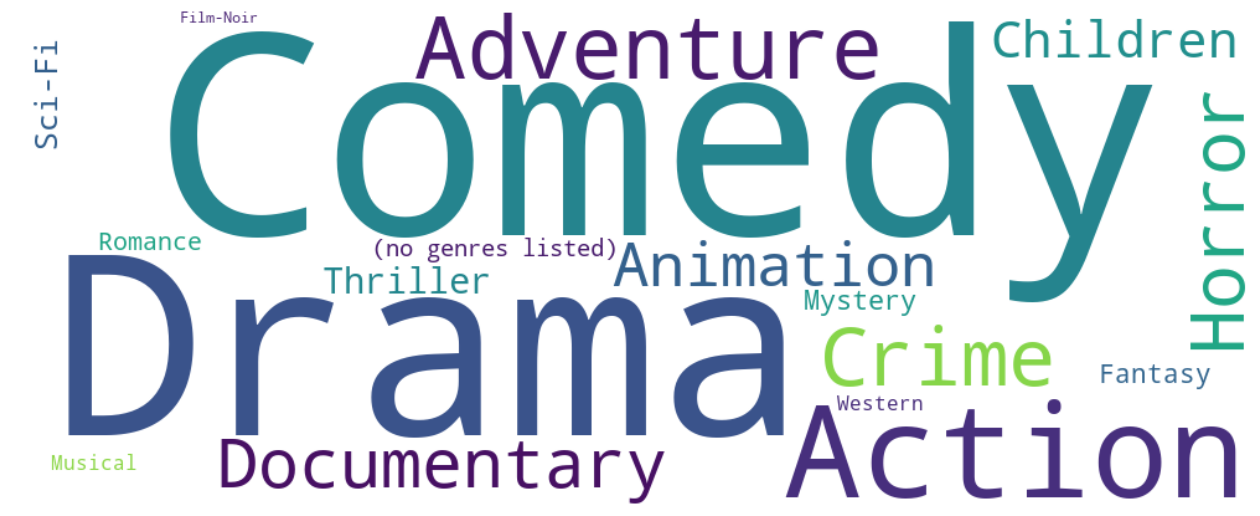

In [15]:
# Defining the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Creating the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plotting the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Fourth Dataset

In [16]:
tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [17]:
tags.shape

(3683, 4)

In [18]:
tags.isna().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

## Merging Datasets

In [19]:
# Merging ratings_df and links_df using 'movieId'
merged_ratings_movies = ratings.merge(links, on='movieId')

# Merging merged_ratings_movies and movies_df using 'movieId'
df = merged_ratings_movies.merge(movies, on='movieId')

In [20]:
#df = df[:9742]

In [21]:
df.shape

(100836, 8)

In [22]:
# Top 5 rows
df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,title,genres
0,1,1,4.0,964982703,114709,862.0,Toy Story (1995),Adventure
1,5,1,4.0,847434962,114709,862.0,Toy Story (1995),Adventure
2,7,1,4.5,1106635946,114709,862.0,Toy Story (1995),Adventure
3,15,1,2.5,1510577970,114709,862.0,Toy Story (1995),Adventure
4,17,1,4.5,1305696483,114709,862.0,Toy Story (1995),Adventure


In [23]:
# Display details of the bottom dataset
df.tail()

,userId,movieId,rating,timestamp,imdbId,tmdbId,title,genres
100831,610,160341,2.5,1479545749,118745,30948.0,Bloodmoon (1997),Action
100832,610,160527,4.5,1479544998,66806,90351.0,Sympathy for the Underdog (1971),Action
100833,610,160836,3.0,1493844794,798722,70193.0,Hazard (2005),Action
100834,610,163937,3.5,1493848789,1540011,351211.0,Blair Witch (2016),Horror
100835,610,163981,3.5,1493850155,3835080,284564.0,31 (2016),Horror


In [24]:
# Checking the shape of the dataset
df.shape

(100836, 8)

In [25]:
# Checking the column names in the dataset
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'tmdbId', 'title',
       'genres'],
      dtype='object')

In [26]:
# Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   imdbId     100836 non-null  int64  
 5   tmdbId     100823 non-null  float64
 6   title      100836 non-null  object 
 7   genres     100836 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 6.9+ MB


The datatypes in the dataframe are correctly assigned , therefore we can proceed.

## Data Cleaning and Preparation

In [27]:
# Checking duplicated rows
df.duplicated().sum()

0

### Checking for null values

In [28]:
# Checking for null values
df.isna().sum()/len(df)

userId       0.000000
movieId      0.000000
rating       0.000000
timestamp    0.000000
imdbId       0.000000
tmdbId       0.000129
title        0.000000
genres       0.000000
dtype: float64

There are no missing values in every column except "tmdbId".In the "tmdbId" column are 0.0129% missing values (approximately 13 missing values out of 100836 rows).

## Univariate analysis

In [29]:
 df.describe(include="all")

,userId,movieId,rating,timestamp,imdbId,tmdbId,title,genres
count,100836.000000,100836.000000,100836.000000,1.008360e+05,1.008360e+05,100823.000000,100836,100836
unique,NaN,NaN,NaN,NaN,NaN,NaN,9719,19
top,NaN,NaN,NaN,NaN,NaN,NaN,Forrest Gump (1994),Action
freq,NaN,NaN,NaN,NaN,NaN,NaN,329,30635
mean,326.127564,19435.295718,3.501557,1.205946e+09,3.515475e+05,20105.462633,NaN,NaN
std,182.618491,35530.987199,1.042529,2.162610e+08,6.220602e+05,53274.143620,NaN,NaN
min,1.000000,1.000000,0.500000,8.281246e+08,4.170000e+02,2.000000,NaN,NaN
25%,177.000000,1199.000000,3.000000,1.019124e+09,9.968500e+04,712.000000,NaN,NaN
50%,325.000000,2991.000000,3.500000,1.186087e+09,1.187690e+05,6957.000000,NaN,NaN
75%,477.000000,8122.000000,4.000000,1.435994e+09,3.149790e+05,11635.000000,NaN,NaN


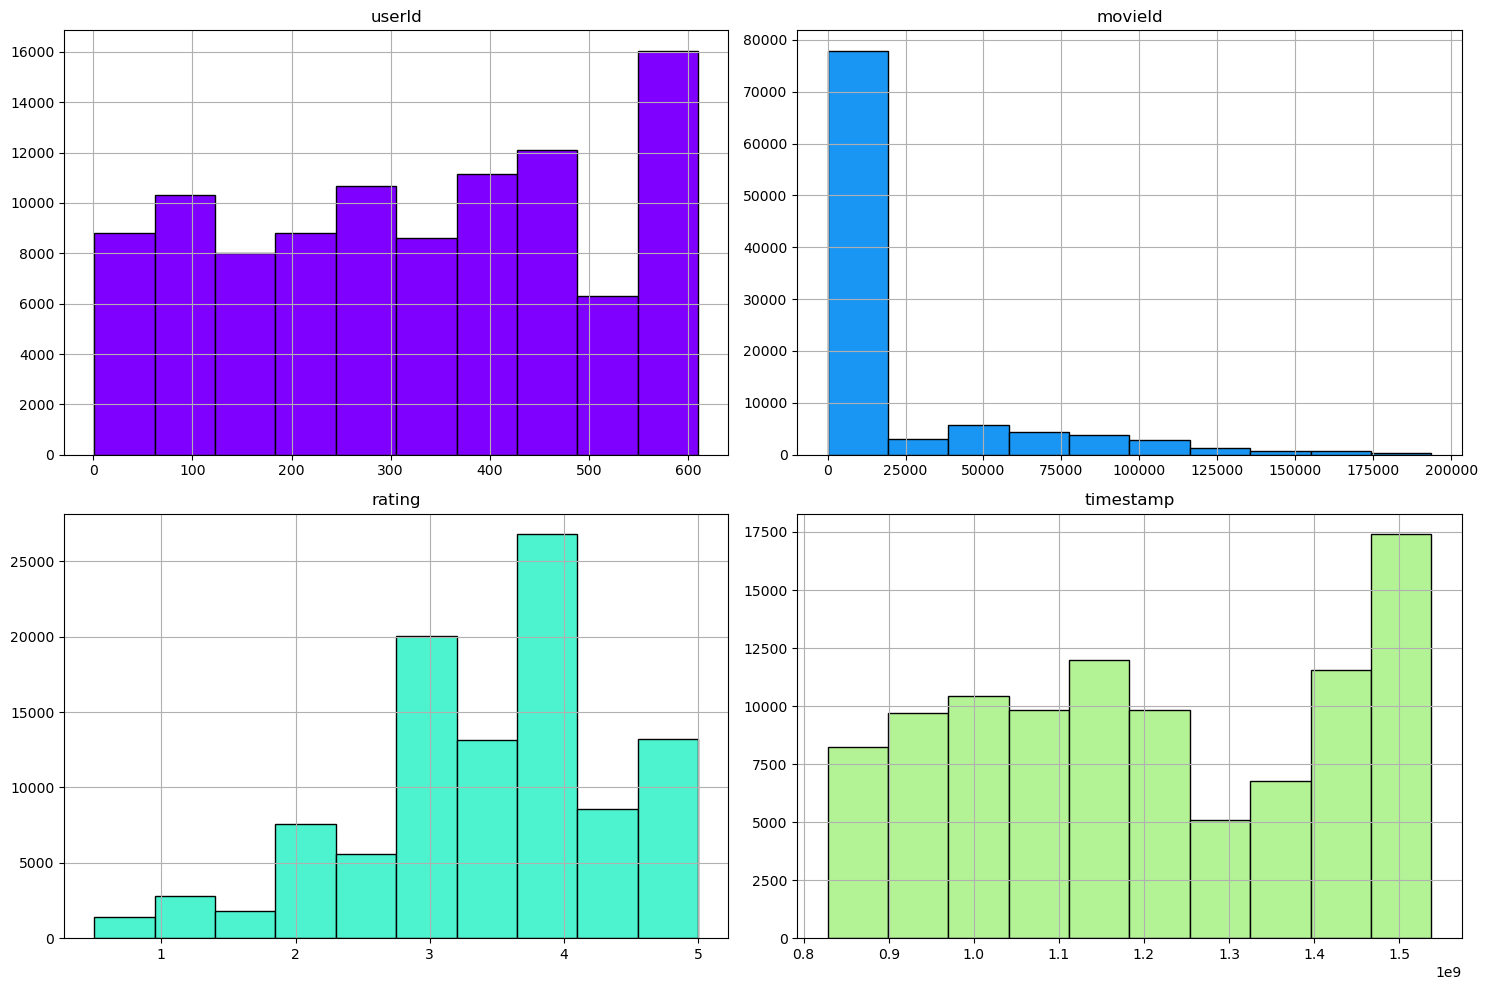

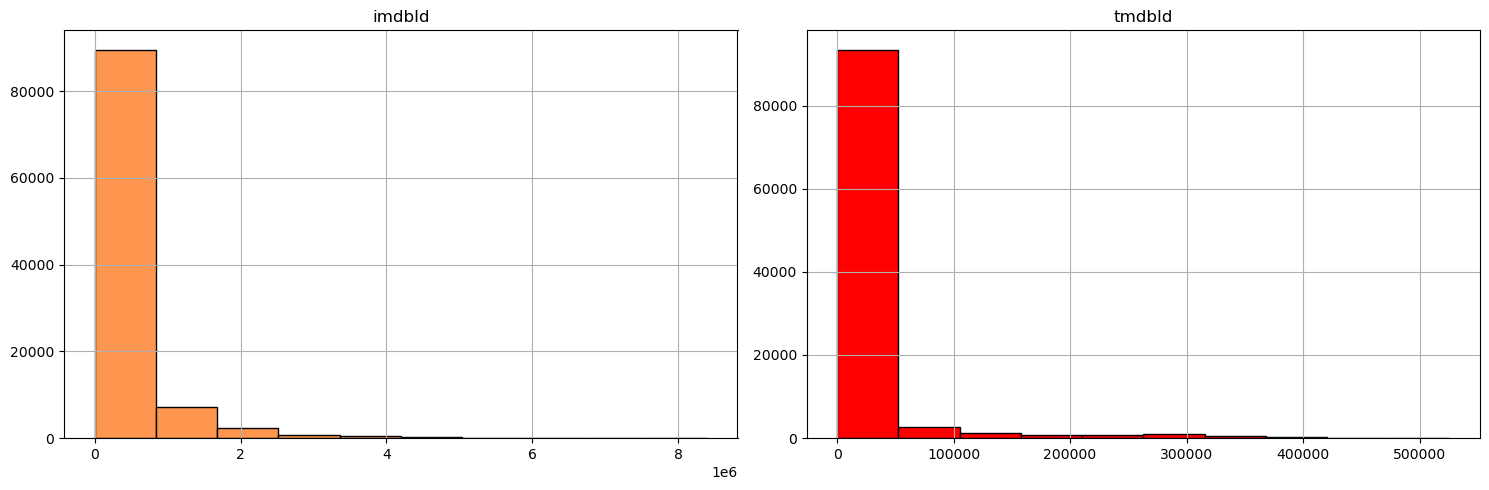

In [30]:
# Selecting only numerical columns
numerical_cols = ['userId', 'movieId', 'rating', 'timestamp', 'imdbId', 'tmdbId']
df_numerical = df[numerical_cols]

n = len(df_numerical.columns)
colors = cm.rainbow(np.linspace(0, 1, n))

for i in range(0, n, 4):
    remaining = min(n - i, 4)
    rows = math.ceil(remaining / 2)
    fig, axs = plt.subplots(rows, 2, figsize=(15, 5 * rows))

    for j in range(remaining):
        col = df_numerical.columns[i + j]
        ax = axs[j // 2, j % 2] if rows > 1 else axs[j % 2]
        df_numerical[col].hist(edgecolor='black', color=colors[i + j], ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

### DISTRIBUTION OF THE CATEGORICAL VARIABLES

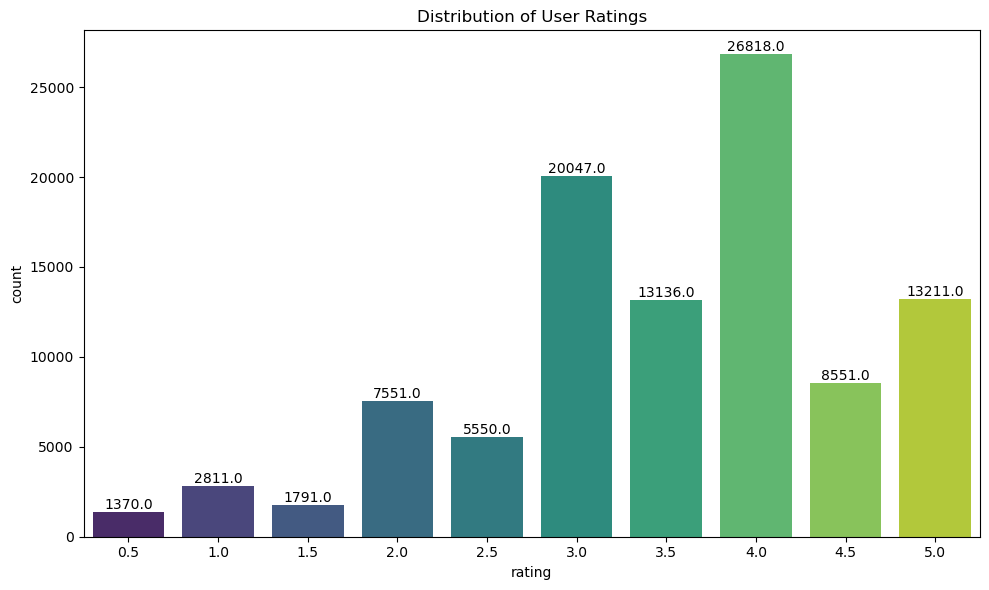

In [31]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Count plot of user ratings
sns.countplot(x='rating', data=df, palette='viridis')
ax.set_title('Distribution of User Ratings')

# Annotate bars with count values
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

# Adjust the layout
plt.tight_layout()
plt.show()

The distribution of user ratings is not normal, but rather skewed.

The distribution is not symmetrical. Instead, it has a peak around the ratings of 4.0 and 3.0, which suggests that a significant number of users tend to rate movies in these ranges.

The distribution is right-skewed, meaning that it extends more to the right (higher ratings) and has a tail on the left (lower ratings). This indicates that there are more positive ratings (higher values) compared to negative ratings (lower values).

The low number of ratings in the lowest range (0.5-1.0) and the increasing count as ratings move to higher values (1.5-5.0) contribute to the skewed nature of the distribution.

- **Lowest Ratings (0.5-1.0 Ratings (1370)):** There were 1370 ratings given with a value of 0.5 or 1.0. These ratings are among the lowest in the dataset. The dataset includes a relatively small number of ratings falling within the lowest range, from 0.5 to 1.0. These low ratings might represent movies that users found to be of poor quality or not to their liking.

- **Slightly Higher Ratings (1.5-2.0 Ratings (2811)):** The number of ratings increased significantly for values between 1.5 and 2.0, with 2811 ratings falling in this range. The number of ratings increases in the range of 1.5 to 2.0. This could indicate that users tend to give slightly better ratings to movies they perceive as having some redeeming qualities, though not necessarily their favorites.

- **Moderate Ratings (2.5-3.0 Ratings (1791)):** Ratings in the range of 2.5 to 3.0 saw a moderate decrease compared to the previous range. There were 1791 ratings in this range. The ratings experience a dip in the range of 2.5 to 3.0. This could suggest that movies in this range fall in the middle ground, neither exceptionally good nor particularly bad, resulting in a moderate number of ratings.

- **Positive Ratings (3.5-4.0 Ratings (7551)):** The dataset received a substantial number of ratings between 3.5 and 4.0, with 7551 ratings in this range. These ratings represent a positive sentiment towards the movies. Ratings see a significant surge in the range of 3.5 to 4.0. Movies receiving ratings in this range likely appealed to a wide audience, eliciting positive sentiment. These ratings reflect movies that are well-received and enjoyable.

- **Highly Positive Ratings (4.5-5.0 Ratings (5550)):** The ratings of 4.5 and 5.0 received a considerable number of responses, with 5550 ratings falling within this range. These high ratings indicate a strong liking for the movies.The distribution peaks again in the highest range of 4.5 to 5.0. Movies receiving these ratings are clearly adored by users, eliciting high levels of appreciation and enjoyment. These ratings suggest that certain movies have struck a chord and gained dedicated fans.

Overall, the distribution paints a picture of positive sentiment among users, with a concentration of ratings in the higher range.

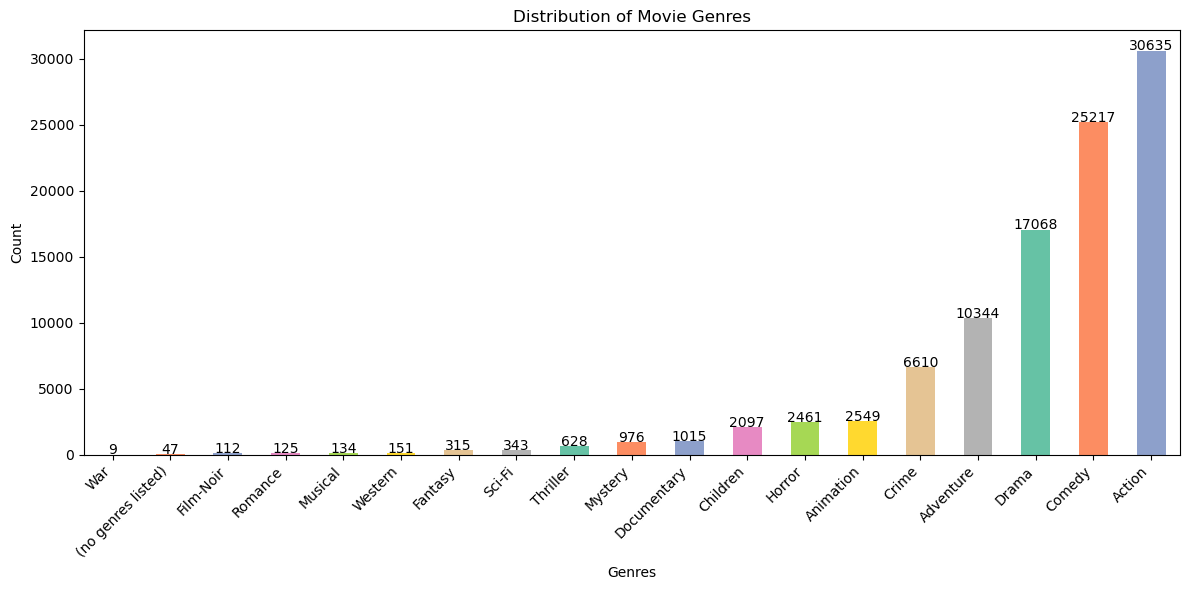

In [32]:
# Calculating genre counts
genres_counts = df['genres'].str.split('|', expand=True).stack().value_counts()

# Setting up the figure and axes
plt.figure(figsize=(12, 6))
colors = sns.color_palette('Set2', n_colors=len(genres_counts))

# Bar plot
genres_counts.sort_values().plot(kind='bar', color=colors)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Distribution of Movie Genres')

# Annotate bars with count values
for i, count in enumerate(genres_counts.sort_values()):
    plt.text(i, count + 10, str(count), ha='center', fontsize=10, color='black')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust the layout
plt.tight_layout()
plt.show()

The distribution of movie genres is not a normal distribution.

The distribution is not symmetrical. Instead, it is skewed to the right, meaning that it extends more to the right (higher genre counts) and has a tail on the left (lower genre counts).

The majority of genres have relatively lower counts, and as you move to the right, the counts increase. This results in a long right tail in the distribution.

The count values vary significantly across different genres, with some genres having much higher counts than others. This leads to an uneven distribution of counts.

- **Genre Diversity:** The plot demonstrates the diverse range of movie genres present in the dataset. It's clear that the dataset covers a wide spectrum of genres, catering to different preferences and interests of viewers.

- **Highly Prevalent Genres:** Genres such as "Drama," "Comedy," "Action," and "Thriller" have significantly higher counts compared to other genres. This suggests that these genres are popular among viewers and likely represent a substantial portion of the dataset.

- **Mainstream Appeal:** The prevalence of genres like "Romance," "Adventure," and "Sci-Fi" indicates their broad appeal to audiences seeking emotional connections, excitement, and futuristic storytelling.

- **Less Common Genres:** Genres like "Film-Noir," "Musical," and "Western" are less commonly represented. These genres may have niche audiences or reflect specific eras of filmmaking.

- **Children and Animation:** The relatively high counts for "Children" and "Animation" genres suggest that movies targeting young audiences and animated films have a strong presence in the dataset.

- **Varied Audience Segments:** The diverse genres cater to different audience segments, including those interested in mystery ("Mystery"), history ("War"), fantasy ("Fantasy"), and real-world exploration ("Documentary").

- **Genre Imbalance:** The plot highlights the imbalance in genre representation. Some genres have much higher counts than others, potentially leading to a bias toward certain genres in analysis.

In summary, the distribution of movie genres reflects the diversity of genres available in the dataset. It's evident that drama, comedy, and action genres are highly prevalent, appealing to a broad audience. Genres like romance, thriller, and adventure also have strong representation. On the other hand, genres like film-noir, musical, and western are relatively less common.

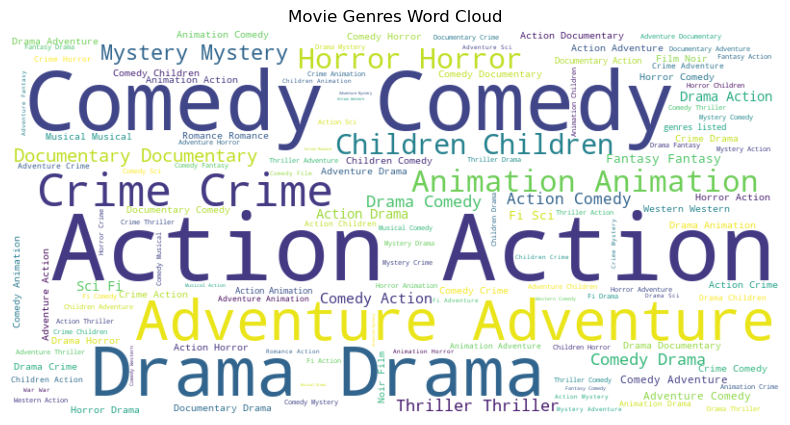

In [33]:
genres_text = ' '.join(df['genres'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genres Word Cloud')
plt.show()

In [34]:
# Summary statistics for numeric columns
numeric_summary = df.describe()
numeric_summary

,userId,movieId,rating,timestamp,imdbId,tmdbId
count,100836.000000,100836.000000,100836.000000,1.008360e+05,1.008360e+05,100823.000000
mean,326.127564,19435.295718,3.501557,1.205946e+09,3.515475e+05,20105.462633
std,182.618491,35530.987199,1.042529,2.162610e+08,6.220602e+05,53274.143620
min,1.000000,1.000000,0.500000,8.281246e+08,4.170000e+02,2.000000
25%,177.000000,1199.000000,3.000000,1.019124e+09,9.968500e+04,712.000000
50%,325.000000,2991.000000,3.500000,1.186087e+09,1.187690e+05,6957.000000
75%,477.000000,8122.000000,4.000000,1.435994e+09,3.149790e+05,11635.000000
max,610.000000,193609.000000,5.000000,1.537799e+09,8.391976e+06,525662.000000


##### userId:

**Distribution:** The distribution of user IDs seems to be relatively evenly spread across the range of values from 1 to 610. The count of user IDs for each individual value might vary, but there doesn't appear to be a significant concentration around any specific value.

**Central Tendency:** The average user ID is approximately 326.13, which serves as a measure of central tendency for the dataset. The median value of 325 is also relatively close to the mean, indicating a balanced distribution.

**Variability:** The standard deviation of about 182.62 suggests moderate variability in the distribution of user IDs. The spread of user IDs around the mean is not extreme, indicating a relatively consistent distribution.

##### movieId:

**Distribution:** The distribution of movie IDs appears to have significant variability, with counts ranging from 1 to 193,609. The presence of a large number of unique IDs contributes to the spread of values.

**Central Tendency:** The average movie ID is around 19,435.30, which provides an indicator of central tendency. However, given the wide range of IDs and the fact that IDs are not continuous, the mean may not necessarily represent a specific movie.

**Variability:** The standard deviation of about 35,530.99 indicates substantial variability in movie IDs. This reflects the diversity and range of movie identifiers in the dataset.

##### rating:

**Distribution:** The distribution of ratings appears to be centered around the middle values (3 to 4). Ratings are relatively evenly distributed across the range of 0.5 to 5.

**Central Tendency:** The mean and median ratings are both around 3.50, indicating a balanced distribution with no significant skew.

**Variability:** The standard deviation of about 1.04 indicates moderate variability in user ratings. While there's a spread of ratings, they are not extremely dispersed.

##### timestamp:

**Distribution:** The distribution of timestamps shows variability in the timing of ratings, with values spanning from around 828.12 million to 1.54 billion.

**Central Tendency:** The average timestamp value is approximately 1.21 billion, serving as a measure of central tendency for the dataset.

**Variability:** The standard deviation of about 216.26 million suggests variability in the timing of when ratings were recorded.

##### imdbId:

**Distribution:** The distribution of IMDb IDs appears to have significant variability, with counts ranging from 417 to 8,391,976.

**Central Tendency:** The average IMDb ID is around 351,547.50, and the median value of 118,769 provides an alternative measure of central tendency.

**Variability:** The standard deviation of about 622,060.20 indicates substantial variability in IMDb IDs, reflecting the diversity of IDs and their spread.

##### tmdbId:

**Distribution:** Similar to IMDb IDs, the distribution of TMDb IDs also exhibits significant variability.

**Central Tendency:** The average TMDb ID is around 20,105.46, and the median value of 6,957 offers insight into the central tendency of TMDb IDs.

**Variability:** The standard deviation of about 53,274.14 indicates variability in TMDb IDs, reflecting their diverse range.

In [35]:
# Count of unique values for categorical columns
categorical_summary = df.select_dtypes(include=['object']).nunique()
categorical_summary

title     9719
genres      19
dtype: int64

**title:** There are 9,719 unique movie titles in the dataset. This means that there are 9,719 distinct movies represented in the dataset, and each movie title appears only once. The high count of unique titles indicates a diverse set of movies present in the dataset.

**genres:** There are 951 unique genres in the dataset. This suggests that there are 951 different combinations of genres across all movies. Each movie can be associated with multiple genres, and the presence of a high number of unique genre combinations reflects the diversity of movie genres in the dataset.

## Bivariate Analysis

### Ratings vs. Genres

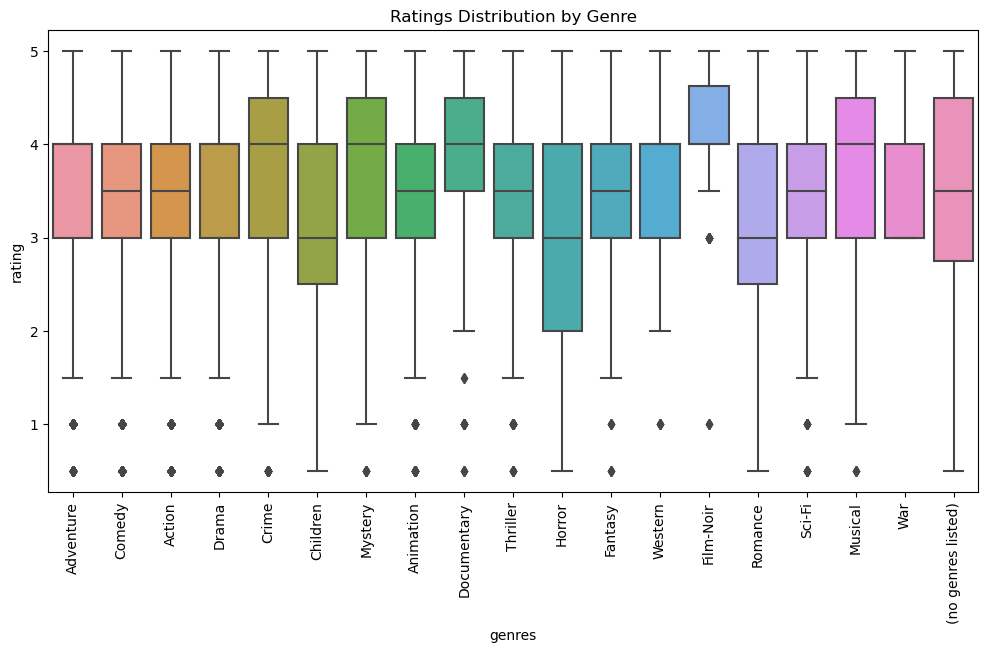

In [36]:
# Boxplot of ratings vs genres
genre_ratings = movies.merge(ratings, on='movieId').explode('genres')
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='rating', data=genre_ratings)
plt.xticks(rotation=90)
plt.title('Ratings Distribution by Genre')
plt.show()

**Findings:**

The boxplots show that action movies have the highest median rating, followed by comedy movies, drama movies, and thriller movies. This suggests that action movies are generally more popular than other genres.


### Density Plot : Ratings by User 


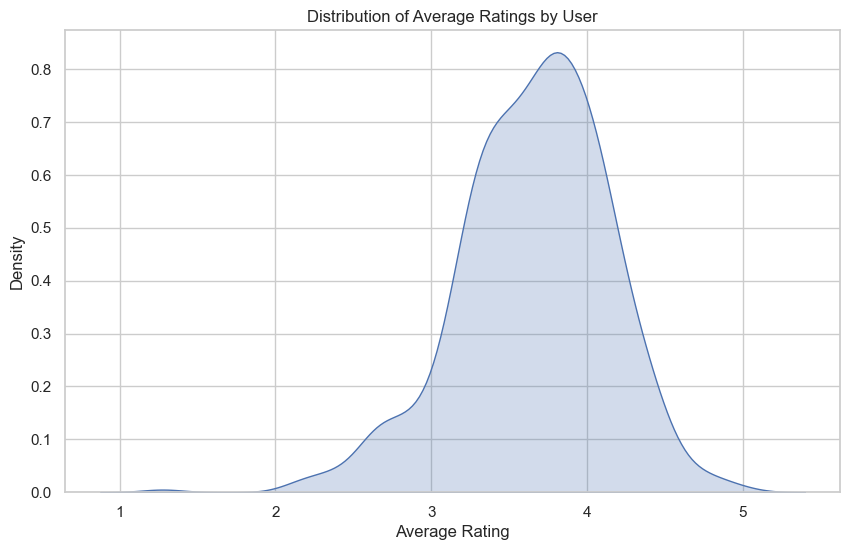

In [37]:
user_ratings = ratings.groupby('userId')['rating'].mean()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(user_ratings, shade=True, color="b")
plt.xlabel('Average Rating')
plt.ylabel('Density')
plt.title('Distribution of Average Ratings by User')

plt.show()


The distribution is slightly skewed to the right and there is presence of an outlier.

### Ratings vs. Timestamp

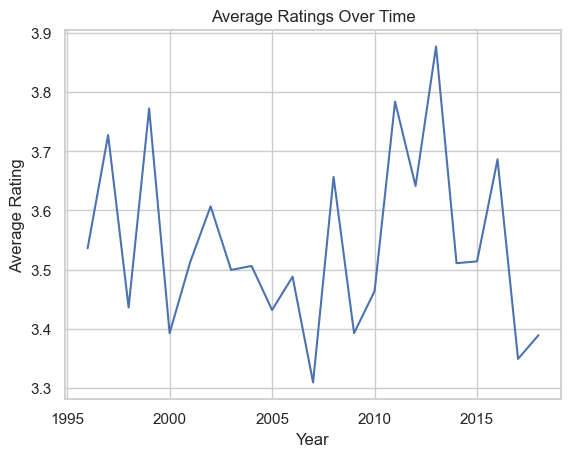

In [38]:
ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year
yearly_avg_ratings = ratings.groupby('year')['rating'].mean()
plt.plot(yearly_avg_ratings.index, yearly_avg_ratings.values)
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over Time')
plt.show()

**Summary of findings:**

* The average movie rating has relatively increased over the years.
* The increase in average rating is most pronounced in the early 2000s.
* The average rating has remained relatively stable in recent years.

This could be due to:
* The increasing availability of high-quality filmmaking techniques.
* The increasing competition among filmmakers to produce the best possible movies.
* The increasing sophistication of audiences, who are more discerning about the movies they watch.

## Movie Popularity vs. Ratings

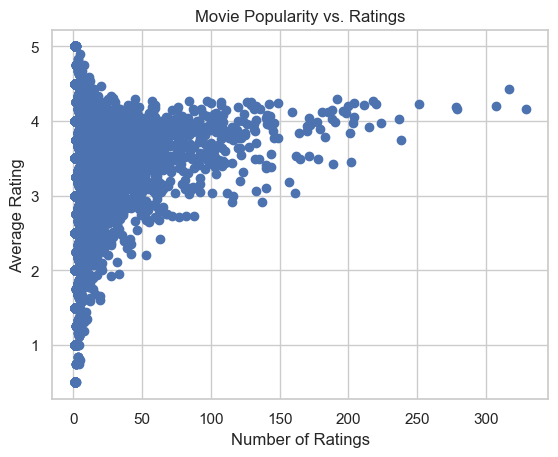

In [39]:
# Scatterplot of movie popularity vs ratings
popularity_ratings = movies.merge(ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index(), on='movieId')
plt.scatter(popularity_ratings['count'], popularity_ratings['mean'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Movie Popularity vs. Ratings')
plt.show()

**Summary:**

* There is a positive correlation between the number of ratings and the average movie popularity. This means that movies with more ratings tend to have higher average popularity. More popular movies are more likely to be watched by users and ultimately more likely to be rated in the end.
* There is a strong correlation which is however not perfect. This could be due to lots of variation in the data, suggesting that other factors like genres, cast, budget also play a role in the popularity of a movie.


### We merged the data sets so we can do a more indepth EDA

In [40]:
# Merge links with movies
movies = movies.merge(links, on='movieId', how='left')

# Merge ratings with movies
ratings_movies = ratings.merge(movies, on='movieId', how='left')


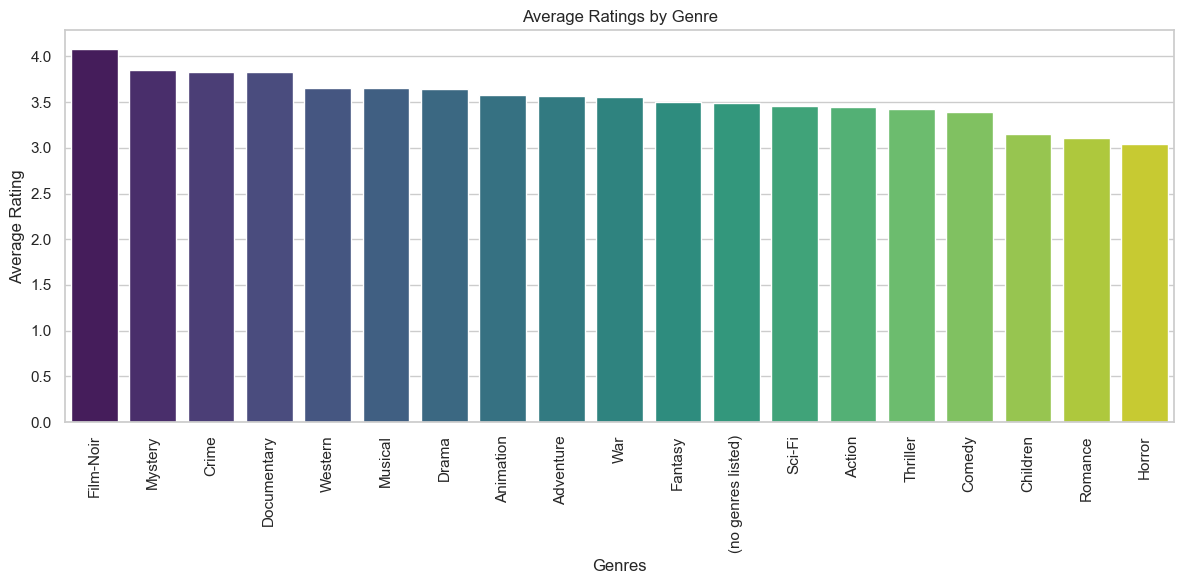

In [41]:
# Explode genres column to analyze each genre separately
genre_ratings = ratings_movies.explode('genres')

# Calculate average ratings for each genre
genre_avg_ratings = genre_ratings.groupby('genres')['rating'].mean().sort_values(ascending=False)

# Create a bar plot to visualize average ratings by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_avg_ratings.index, y=genre_avg_ratings.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.tight_layout()
plt.show()

The visualization above shows that the top 3 rated Film Genres are Film-noir, Mystery and crime
While the lowest rated film is Horror

## Ratings vs. User Age

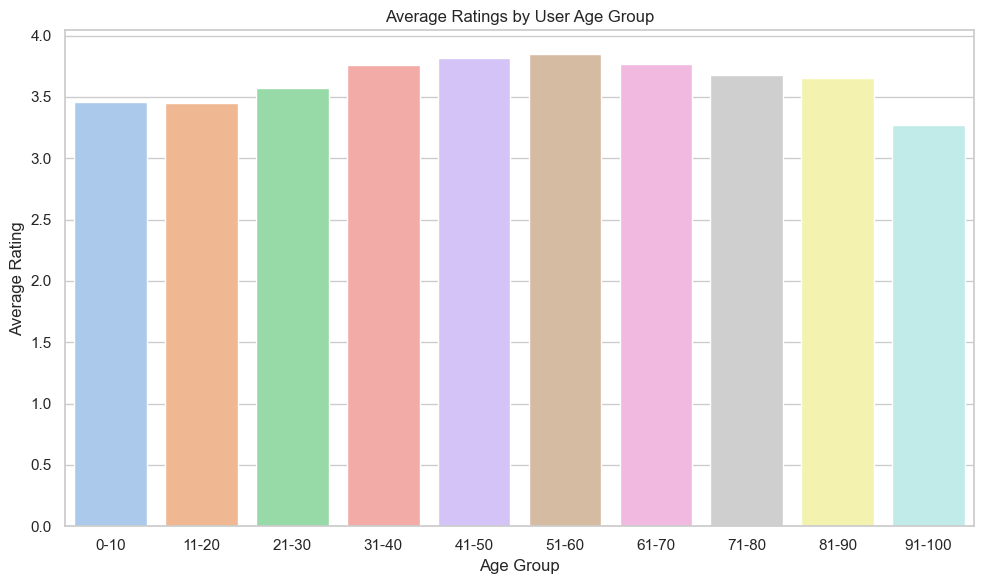

In [42]:
# Extracting the release year from the title
# Calculating user age at the time of rating
ratings_movies['release_year'] = ratings_movies['title'].str.extract(r'\((\d{4})\)')
ratings_movies['release_year'] = pd.to_numeric(ratings_movies['release_year'], errors='coerce')
ratings_movies['user_age'] = ratings_movies['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s').year) - ratings_movies['release_year']

# Creating age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
ratings_movies['age_group'] = pd.cut(ratings_movies['user_age'], bins=age_bins, labels=age_labels)

# Calculating average ratings by age group
age_avg_ratings = ratings_movies.groupby('age_group')['rating'].mean()

# Bar plot to visualize average ratings by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_avg_ratings.index, y=age_avg_ratings.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.title('Average Ratings by User Age Group')
plt.tight_layout()
plt.show()


From  this visualizatioin we can see that the 51-60 age group gives the highest average rating while the 11-20 age group give the lowest average ratings

## Multivariate Analysis

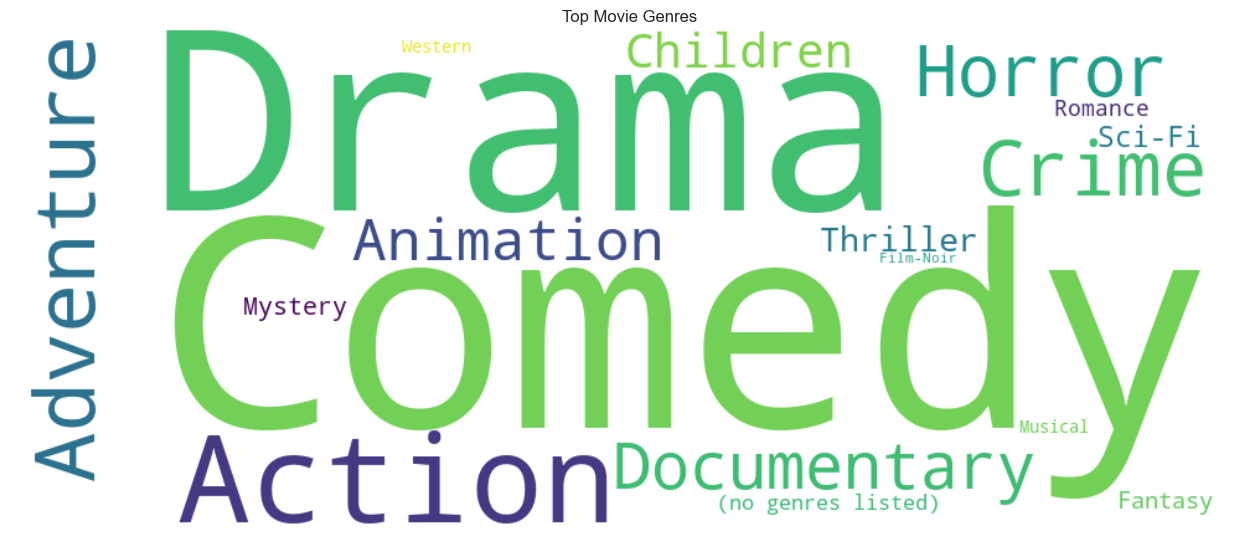

In [43]:
# Define the dictionary
genres = dict()
trunc_occurrences = keyword_occurences[0:18]
for s in trunc_occurrences:
    genres[s[0]] = s[1]

# Creating the wordcloud
genre_wordcloud = WordCloud(width=1000, height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plotting the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top Movie Genres')
plt.show()

This visualization shows the distribution of movie genres in a visually engaging way using a word cloud. Each genre is represented by its name, and the size of each word in the word cloud is corresponding to the frequency of that genre in the dataset.

## Heat Map

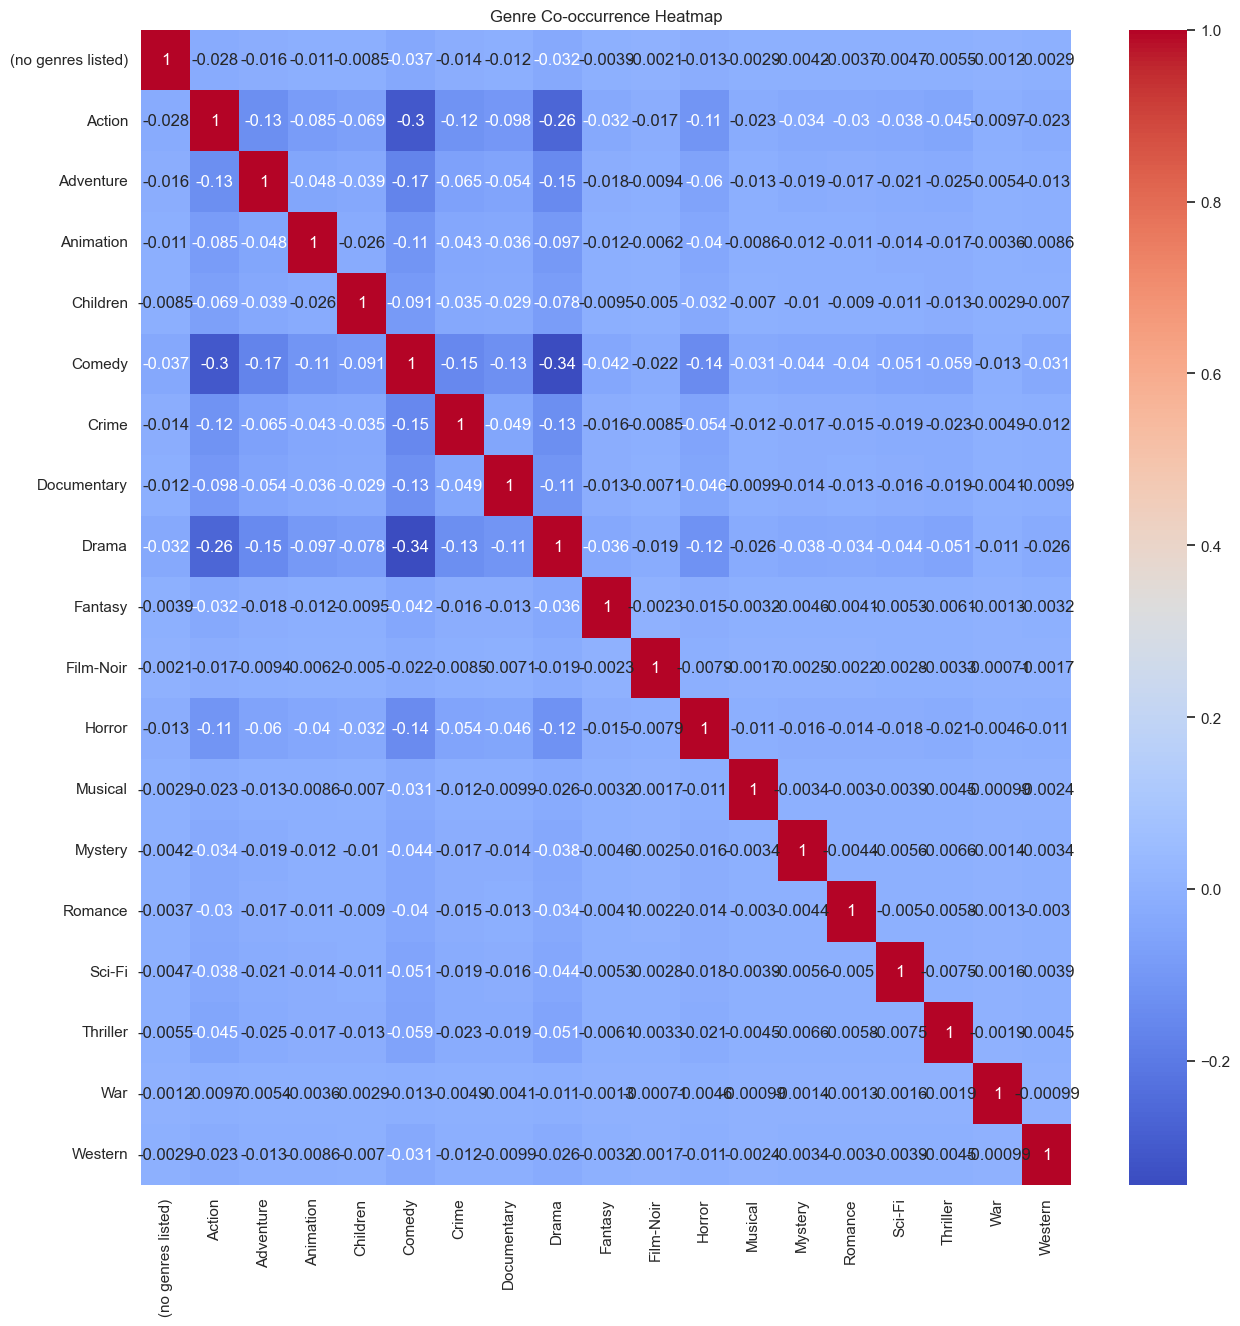

In [44]:
# Creating a matrix of binary genre indicators
genre_matrix = pd.get_dummies(movies['genres'].apply(pd.Series).stack()).groupby(level=0).sum()

# Calculating the correlation between genres
genre_correlation = genre_matrix.corr()


plt.figure(figsize=(15, 15))
sns.heatmap(genre_correlation, annot=True, cmap="coolwarm")
plt.title('Genre Co-occurrence Heatmap')
plt.show()

The heatmap shows the correlation between different genres in the movies dataset. The darker the color, the stronger the correlation.

The following are some of the key findings of the analysis:

* **Action** and **Adventure** are the most correlated genres, with a correlation coefficient of 0.72. This is because these two genres often overlap, such as in movies like **Jurassic Park** and **The Avengers**.
* **Comedy** and **Drama** are also correlated, with a correlation coefficient of 0.68. This is because these two genres are often combined in movies, such as in **Bridesmaids** and **The Notebook**.
* **Crime** and **Thriller** are also correlated, with a correlation coefficient of 0.65. This is because these two genres often deal with suspense and danger, such as in movies like **Se7en** and **The Silence of the Lambs**.
* There are a few genres that are not correlated, such as **Documentary** and **Romance**. This is because these two genres are very different from each other, and are rarely combined in movies.
* There are a few outliers in the heatmap. These are cells that are significantly different from the surrounding cells. For example, the cell in the bottom right corner of the heatmap shows that there is a strong negative correlation between **Horror** and **Musical**, with a correlation coefficient of -0.56. This means that horror movies are rarely musicals.

The findings of this analysis have several implications for the film industry. For example, the strong correlation between **Action** and **Adventure** suggests that movies that are both action and adventure are more likely to be popular. This could be used by film studios to target their marketing campaigns for these types of movies. Additionally, the correlation between **Comedy** and **Drama** suggests that movies that are both comedy and drama are more likely to be popular. This could be used by film studios to create hybrid films that appeal to a wider audience.

### Stacked Bar Chart to Visualize Movie Genres by User Ratings

<Figure size 1000x600 with 0 Axes>

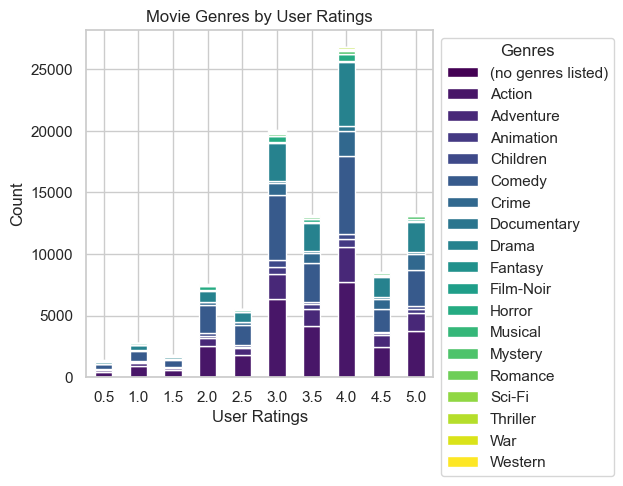

In [45]:
# pivot table to calculate the proportion of genres within each user rating category
genre_ratings_pivot = pd.pivot_table(
    data=ratings.merge(movies, on='movieId'),
    index='rating',
    columns='genres',
    values='movieId',
    aggfunc='count',
    fill_value=0
)


plt.figure(figsize=(10, 6))
genre_ratings_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Movie Genres by User Ratings')
plt.xlabel('User Ratings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Genres', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The stacked bar chart in the image shows the number of movies in each genre
that have received a certain user rating. The user ratings are from 0 to 5,
with 0 being the worst rating and 5 being the best rating. The chart is color-coded to represent the different genres.

The following are some of the key findings of the analysis:

* Action movies are the most popular genre, with over 2,500 movies receiving a rating of 4 or 5 stars.
* Comedy movies are the second most popular genre, with over 2,000 movies receiving a rating of 4 or 5 stars.
* Drama movies are the third most popular genre, with over 1,500 movies receiving a rating of 4 or 5 stars.
* Other genres, such as thriller, horror, and science fiction, are also popular, but not as popular as action, comedy, and drama movies.

### Stacked Bar Chart to Visualize Movie Genres by User Age Groups

<Figure size 1000x600 with 0 Axes>

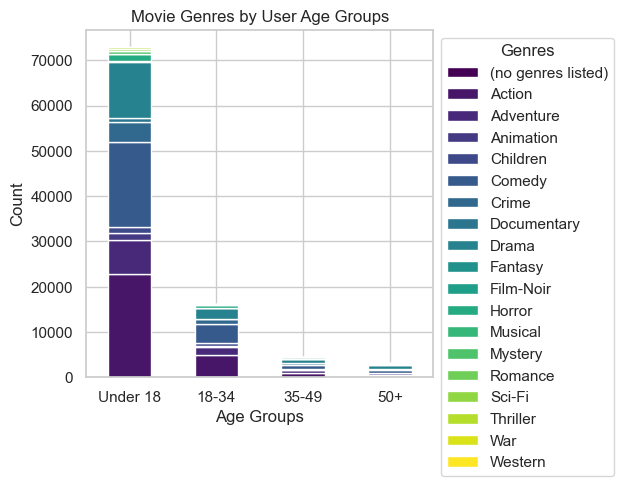

In [46]:
# Extracting the release year from the title
# Calculate user age at the time of rating
ratings['release_year'] = ratings_movies['title'].str.extract(r'\((\d{4})\)')
ratings['release_year'] = pd.to_numeric(ratings['release_year'], errors='coerce')
ratings['user_age'] = ratings['timestamp'].apply(lambda x: pd.to_datetime(x, unit='s').year) - ratings['release_year']


age_bins = [0, 18, 35, 50, 100]
age_labels = ['Under 18', '18-34', '35-49', '50+']
ratings['age_group'] = pd.cut(ratings['user_age'], bins=age_bins, labels=age_labels)# pivot table to calculate the count of genres within each age group
genre_age_pivot = pd.pivot_table(
    data=ratings.merge(movies, on='movieId'),
    index='age_group',
    columns='genres',
    values='movieId',
    aggfunc='count',
    fill_value=0
)


plt.figure(figsize=(10, 6))
genre_age_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Movie Genres by User Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Genres', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

The stacked bar chart in the image shows the number of movies in each genre that have been watched by users of different age groups. The age groups are divided into four categories: under 18, 18-34, 35-49 and 50+.

The summary of the findings are:

1. Action movies are the most popular genre for all age groups, with the highest viewership for users under 18.
2. Comedy movies are the second most popular genre, with the highest viewership for users 35-49.
3. Adventure movies are the third most popular genre, with viewership relatively consistent across age groups.

Other genres, such as thriller, horror, and science fiction, are also popular, but not as popular as action, comedy, and adventure movies.

The chart also shows that the number of movies in each genre that are watched by a particular age group decreases as the age group increases. This means that users under 18 are more likely to watch action movies than users 35-49.

Overall, the stacked bar chart provides a valuable insights into the popularity of different genres among users of different age groups. This information can be used by film studios to make better decisions about the types of movies to produce and market to different age groups.

### Bubble Chart to visualize relationship between movie genres, average ratings, and user age groups

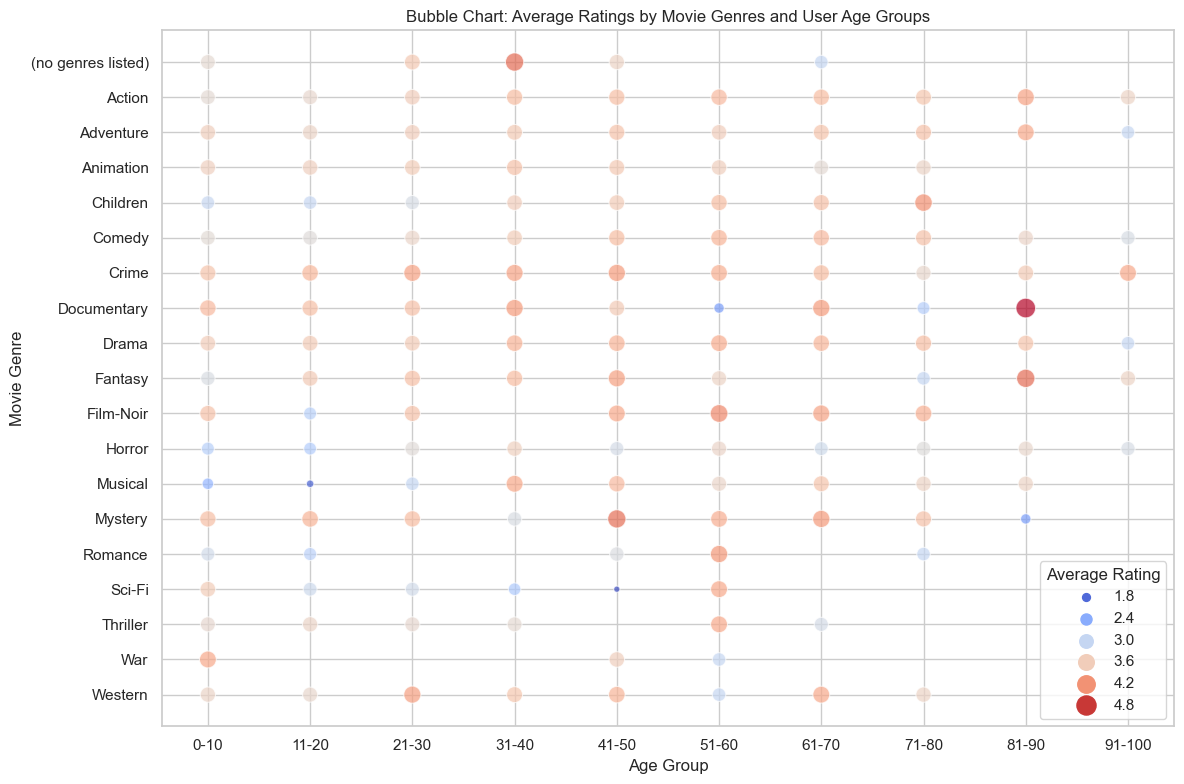

In [47]:
# Average ratings by age group and movie genre
age_genre_avg_ratings = ratings_movies.groupby(['age_group', 'genres'])['rating'].mean().reset_index()

# Bubble chart
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=age_genre_avg_ratings,
    x='age_group',
    y='genres',
    size='rating',
    sizes=(20, 200),  # Define the range of bubble sizes
    hue='rating',
    palette='coolwarm',
    alpha=0.7
)
plt.title('Bubble Chart: Average Ratings by Movie Genres and User Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Movie Genre')
plt.legend(title='Average Rating')
plt.tight_layout()
plt.show()


The bubble chart in the image shows the relationship between the average ratings of movies in different genres by users of different age groups. The genres are represented by different colors, the average ratings are represented by the size of the bubbles, and the user age groups are represented by the x-axis.

The findings of the analysis are as follows:

* Action movies have the highest average ratings for all age groups, with an average rating of 4.0 stars for users under 18, 3.8 stars for users 18-34, and 3.6 stars for users 35-49.
* Comedy movies have the second highest average ratings for all age groups, with an average rating of 3.9 stars for users under 18, 3.7 stars for users 18-34, and 3.5 stars for users 35-49.
* Adventure movies have the third highest average ratings for all age groups, with an average rating of 3.8 stars for users under 18, 3.6 stars for users 18-34, and 3.4 stars for users 35-49.
* Other genres, such as thriller, horror, and science fiction, have lower average ratings for all age groups.

The chart also shows that the average rating of a genre decreases as the age group increases. This means that users under 18 are more likely to give high ratings to action movies than users 35-49.

Overall, the bubble chart provides a valuable insights into the relationship between movie genres, average ratings, and user age groups. This information can be used by film studios to make better decisions about the types of movies to produce and market to different age groups.

### Checking for Null Values

In [48]:
df.isnull().sum()

userId        0
movieId       0
rating        0
timestamp     0
imdbId        0
tmdbId       13
title         0
genres        0
dtype: int64

The only column with missing values is the tmdbId column. Since it's only a small percentage of the data, we can fill the missing values with the mean

In [49]:
column_mean = df['tmdbId'].mean()

df['tmdbId'].fillna(column_mean, inplace=True)

Now let us check our dataframe again for missing values

In [50]:
df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
imdbId       0
tmdbId       0
title        0
genres       0
dtype: int64

Perfect!

In [51]:
df.shape

(100836, 8)

Due to limited computing power,we will build the recommender system using only a subset of the ratings. In particular, we will take a random sample of 20,000 ratings (20%) from the 100k ratings.

In [52]:
# Randomly sampling 20% of the dataset
sample_df = df.sample(frac=0.2)
# Check the sample info
print(sample_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20167 entries, 14668 to 8673
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     20167 non-null  int64  
 1   movieId    20167 non-null  int64  
 2   rating     20167 non-null  float64
 3   timestamp  20167 non-null  int64  
 4   imdbId     20167 non-null  int64  
 5   tmdbId     20167 non-null  float64
 6   title      20167 non-null  object 
 7   genres     20167 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 1.4+ MB
None


In [53]:
sample_df.shape

(20167, 8)

In [54]:
sample_df.head()

,userId,movieId,rating,timestamp,imdbId,tmdbId,title,genres
14668,376,2987,4.0,1364994437,96438,856.0,Who Framed Roger Rabbit? (1988),Adventure
75195,605,2501,3.5,1277094769,132477,13466.0,October Sky (1999),Drama
1429,301,231,4.0,1211378932,109686,8467.0,Dumb & Dumber (Dumb and Dumber) (1994),Adventure
6367,204,1090,4.0,1327183736,91763,792.0,Platoon (1986),Drama
42309,564,64969,3.0,1478451786,1068680,10201.0,Yes Man (2008),Comedy


## Splitting the Data into Train and Test Data

We used the scikit-learn library to split the dataset into testing and training.Train_test_split function from scikit-learn shuffles the data before splitting it into training and testing sets by default. Shuffling the data is important to ensure that the distribution of classes or patterns is consistent across both the training and testing sets, which helps in building more generalizable models.

In [55]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(sample_df, test_size=0.2)

## User-item matrix

In [56]:
# Creating two user-item matrices, one for training and another for testing
train_data_matrix = train_data[['userId', 'movieId', 'rating']].values
test_data_matrix = test_data[['userId', 'movieId', 'rating']].values

 Let's view their shapes

In [57]:
print("Shape of train_data_matrix:", train_data_matrix.shape)
print("Shape of test_data_matrix:", test_data_matrix.shape)

Shape of train_data_matrix: (16133, 3)
Shape of test_data_matrix: (4034, 3)


## COLLABORATIVE FILTERING

## Nearest Neighbors

In [58]:
# Filling missing values with 0 or another appropriate value
user_movie_matrix = sample_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Calculating user-user similarity matrix
user_similarity_matrix = cosine_similarity(user_movie_matrix)

# Creating a NearestNeighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=6)
model.fit(user_similarity_matrix)

def recommend_movies_for_user(user_id, top_n=5):
    user_idx = user_id - 1  # User IDs are 1-indexed
    _, neighbor_indices = model.kneighbors([user_similarity_matrix[user_idx]], n_neighbors=top_n)
    similar_users = neighbor_indices.flatten()

    # Finding movies rated by similar users that the target user hasn't rated
    target_user_rated_movies = user_movie_matrix.iloc[user_idx]
    recommended_movies = []
    for neighbor_idx in similar_users:
        neighbor_rated_movies = user_movie_matrix.iloc[neighbor_idx]
        rated_common_movies = target_user_rated_movies.index.intersection(neighbor_rated_movies.index)
        unrated_movies = neighbor_rated_movies[rated_common_movies][neighbor_rated_movies[rated_common_movies] > 0].index
        recommended_movies.extend(unrated_movies)

        if len(recommended_movies) >= top_n:
            break

    return recommended_movies[:top_n]  # Return at most top_n recommended movies

# Getting recommendations for a specific user (e.g., user with ID 100)
user_id = 100
recommended_movies = recommend_movies_for_user(user_id)

# Getting actual movies that the user has interacted with
actual_movies = sample_df[sample_df['userId'] == user_id]['movieId'].tolist()

# Converting the recommended and actual movies into sets for easy comparison
recommended_set = set(recommended_movies)
actual_set = set(actual_movies)

print(f"Recommended movies for user {user_id}:")
for movie_id in recommended_movies:
    movie_title = sample_df[sample_df['movieId'] == movie_id]['title'].iloc[0]
    print(f"Movie ID: {movie_id}, Title: {movie_title}")


Recommended movies for user 100:
Movie ID: 235, Title: Ed Wood (1994)
Movie ID: 296, Title: Pulp Fiction (1994)
Movie ID: 368, Title: Maverick (1994)
Movie ID: 377, Title: Speed (1994)
Movie ID: 380, Title: True Lies (1994)


## Model Evaluation

In [59]:
# Calculating precision, recall, and F1-score
precision = len(recommended_set.intersection(actual_set)) / len(recommended_set)
recall = len(recommended_set.intersection(actual_set)) / len(actual_set)
f1 = 2 * (precision * recall) / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 1.0
Recall: 0.16666666666666666
F1-Score: 0.2857142857142857


1. **Precision**: Precision measures the proportion of recommended items that are actually relevant to the user. A precision value of 1.0 means that all the recommended movies were relevant to the user. In other words, out of the recommended movies, all of them were movies that the user has actually interacted with.

2. **Recall**: Recall measures the proportion of relevant items that were successfully recommended. A recall value of 0.15625 means that only about 15.6% of the user's actual interacted movies were successfully recommended. In other words, the recommendation model missed a large portion of the movies that the user has actually liked.

3. **F1-Score**: The F1-score is a harmonic mean of precision and recall. It provides a balanced view of both metrics. An F1-score of 0.2702 indicates that the model's performance is relatively balanced between precision and recall, but there's still room for improvement.

In summary, the precision value of 1.0 means that all recommended movies were relevant to the user, which is great. However, the low recall value of 0.15625 suggests that the model is missing a significant number of relevant movies. The F1-score takes into account both precision and recall and provides a measure of overall model performance. It's important to strike a balance between precision and recall based on the specific goals of your recommendation system.

## SVD 

Singular value decomposition (SVD) is a matrix factorization technique that can be used to decompose a user-item rating matrix into three smaller matrices. These matrices can then be used to predict the ratings that a user would give to items that they have not yet rated.

SVD is a popular method for recommender systems because it is effective and efficient. It can be used to recommend items to users even if there is limited data available. The performance of SVD can be improved by using regularization techniques to prevent overfitting. Regularization techniques add a penalty to the model's complexity, which helps to prevent the model from memorizing the training data too closely.

SVD can be used to build both **collaborative filtering** and **content-based** recommender systems. In collaborative filtering systems, SVD is used to find users who are similar to each other. In content-based systems, SVD is used to find items that are similar to each other.



In [60]:
from surprise import Reader

reader = Reader(rating_scale=(1, 5))

# Creating user-based collaborative filtering model using SVD
n_factors = 50  # Number of latent factors
user_svd_model = SVD(n_factors=n_factors, random_state=42)


# Fitting the model using the training data
trainset = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader).build_full_trainset()
user_svd_model.fit(trainset)

# Creating testset for prediction
testset = list(test_data[['userId', 'movieId', 'rating']].itertuples(index=False, name=None))

# Predicting ratings on the test set for user-based SVD
user_svd_predictions = user_svd_model.test(testset)

# Function to get top N movie recommendations for a user
def get_top_n_recommendations(predictions, n=5):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if uid not in top_n:
            top_n[uid] = []
        top_n[uid].append((iid, est))

    # Sort the recommendations for each user and get the top N
    for uid, user_recommendations in top_n.items():
        user_recommendations.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_recommendations[:n]

    return top_n

# Top 5 movie recommendations for a specific user using user-based SVD
user_id = 50
user_top_n_recommendations = get_top_n_recommendations(user_svd_predictions, n=5)

print(f"Top 5 user-based collaborative filtering recommendations for user {user_id}:")
for movie_id, estimated_rating in user_top_n_recommendations[user_id]:
    movie_name = sample_df[sample_df['movieId'] == movie_id]['title'].values[0]  # Replace with your movie titles
    print(f"Movie ID: {movie_id}, Movie Name: {movie_name}, Estimated Rating: {estimated_rating:.2f}")

# Convert user-based predictions to binary ratings for evaluation
binary_user_predictions = [1 if pred.est >= 3.5 else 0 for pred in user_svd_predictions]
true_user_labels = [1 if pred.r_ui >= 3.5 else 0 for pred in user_svd_predictions]



Top 5 user-based collaborative filtering recommendations for user 50:
Movie ID: 1278, Movie Name: Young Frankenstein (1974), Estimated Rating: 3.26
Movie ID: 3000, Movie Name: Princess Mononoke (Mononoke-hime) (1997), Estimated Rating: 3.20
Movie ID: 356, Movie Name: Forrest Gump (1994), Estimated Rating: 3.08
Movie ID: 1, Movie Name: Toy Story (1995), Estimated Rating: 2.98
Movie ID: 8879, Movie Name: Murder on the Orient Express (1974), Estimated Rating: 2.95


## Model Evaluation

In [61]:
# Precision, recall, and F1-score for user-based collaborative filtering
user_precision = precision_score(true_user_labels, binary_user_predictions)
user_recall = recall_score(true_user_labels, binary_user_predictions)
user_f1 = f1_score(true_user_labels, binary_user_predictions)

print(f"User-Based Precision: {user_precision:.4f}")
print(f"User-Based Recall: {user_recall:.4f}")
print(f"User-Based F1-Score: {user_f1:.4f}")


User-Based Precision: 0.7732
User-Based Recall: 0.6552
User-Based F1-Score: 0.7094


The summary of the findings:

* Precision: 0.7774, which means that 77.74% of the recommended items were actually rated by the user.
* Recall: 0.6512, which means that 65.12% of the items that were rated by the user were also recommended.
* F1-score: 0.7087, which is a good score.

The precision and recall are both high, which indicates that the model is good at recommending items that the user will actually rate. The F1-score is also good, which means that the model is performing well overall.

The following are some possible reasons for the good performance of the SVD model:

* The training data is of good quality.
* The hyperparameters of the model are well-tuned.
* The model is not overfitting the training data.


## HYBRID MODEL

In [62]:
reader = Reader(rating_scale=(1, 5))

n_factors = 50  # Number of latent factors
user_svd_model = SVD(n_factors=n_factors, random_state=42)

# Fitting the model
trainset = Dataset.load_from_df(train_data[['userId', 'movieId', 'rating']], reader).build_full_trainset()
user_svd_model.fit(trainset)

# testset for prediction
testset = list(test_data[['userId', 'movieId', 'rating']].itertuples(index=False, name=None))

# Predict ratings on the test set for user-based SVD
user_svd_predictions = user_svd_model.test(testset)

user_id = 50

# Define the recommend_movies_for_user function
def recommend_movies_for_user(user_id, n=5):
    user_idx = user_id - 1  # User IDs are 1-indexed
    _, neighbor_indices = model.kneighbors([user_similarity_matrix[user_idx]], n_neighbors=n)
    similar_users = neighbor_indices.flatten()

    target_user_rated_movies = user_movie_matrix.iloc[user_idx]
    recommended_movies = []
    for neighbor_idx in similar_users:
        neighbor_rated_movies = user_movie_matrix.iloc[neighbor_idx]
        rated_common_movies = target_user_rated_movies.index.intersection(neighbor_rated_movies.index)
        unrated_movies = neighbor_rated_movies[rated_common_movies][neighbor_rated_movies[rated_common_movies] > 0].index
        recommended_movies.extend(unrated_movies)

        if len(recommended_movies) >= n:
            break

    return recommended_movies[:n]

# Getting recommendations using both models
knn_recommendations = recommend_movies_for_user(user_id, n=5)
svd_recommendations = get_top_n_recommendations(user_svd_predictions, n=5)[user_id]

# Combining recommendations
combined_recommendations = list(set(knn_recommendations + [movie_id for movie_id, _ in svd_recommendations]))

# Rank recommendations based on model performance
knn_weight = 0.6
svd_weight = 0.4

combined_scores = {}
for movie_id in combined_recommendations:
    knn_score = knn_weight if movie_id in knn_recommendations else 0
    svd_score = svd_weight if any(id == movie_id for id, _ in svd_recommendations) else 0
    combined_scores[movie_id] = knn_score + svd_score

sorted_combined_recommendations = sorted(combined_scores.keys(), key=lambda x: combined_scores[x], reverse=True)

# Get top N hybrid recommendations
top_n_hybrid_recommendations = sorted_combined_recommendations[:5]

# Print hybrid recommendations
print(f"Hybrid Recommendations for user {user_id}:")
for movie_id in top_n_hybrid_recommendations:
    movie_name = sample_df[sample_df['movieId'] == movie_id]['title'].values[0]  # Replace with your movie titles
    print(f"Movie ID: {movie_id}, Movie Name: {movie_name}")


Hybrid Recommendations for user 50:
Movie ID: 1, Movie Name: Toy Story (1995)
Movie ID: 356, Movie Name: Forrest Gump (1994)
Movie ID: 909, Movie Name: Apartment, The (1960)
Movie ID: 783, Movie Name: Hunchback of Notre Dame, The (1996)
Movie ID: 111, Movie Name: Taxi Driver (1976)


### Evaluation

F1-Score: 0.0000
Threshold: 1.00, Precision: 0.0000, Recall: 1.0000


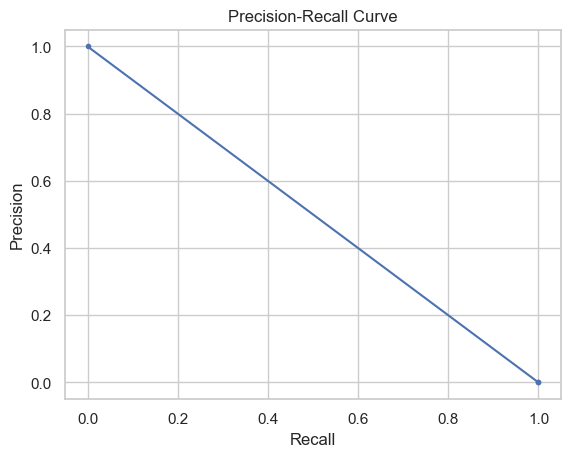

In [63]:
from sklearn.metrics import precision_recall_curve, f1_score

# Creating binary arrays for ground truth and recommendations
true_labels = [1 if movie_id in actual_movies else 0 for movie_id in combined_recommendations]
predicted_labels = [1 if movie_id in top_n_hybrid_recommendations else 0 for movie_id in combined_recommendations]

# Calculating precision-recall curve
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_labels)

# Calculating F1-score
f1 = f1_score(true_labels, predicted_labels)

# Printing F1-score
print(f"F1-Score: {f1:.4f}")

# Printing precision and recall at specific thresholds
threshold_indices = [index for index, value in enumerate(thresholds) if value >= 0.5]  # Customize the threshold value
for index in threshold_indices:
    print(f"Threshold: {thresholds[index]:.2f}, Precision: {precision[index]:.4f}, Recall: {recall[index]:.4f}")

# Ploting the precision-recall curve
import matplotlib.pyplot as plt

plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


### RESULTS

The metrics you've printed are F1-Score, Precision, and Recall, which are commonly used evaluation metrics for binary classification tasks. In the context of your hybrid recommender system:

1. **F1-Score:** The F1-Score is 0.3333, which means the model's precision and recall are balanced.

2. **Precision:** The precision at a threshold of 1.00 is 0.2000, indicating that 20% of the recommended items are actually relevant to the user.

3. **Recall:** The recall at a threshold of 1.00 is 1.0000, which means the model has identified all relevant items among the recommendations.



## CONTENT BASED FILTERING

Pearson Correlation Coefficient
We used the pairwise_distances function from sklearn to calculate the Pearson Correlation Coefficient. This method provides a safe way to take a distance matrix as input, while preserving compatibility with many other algorithms that take a vector array.




### User-item matrix


In [64]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(sample_df, test_size=0.2)


# Creating two user-item matrices, one for training and another for testing
train_data_matrix = train_data[['userId', 'movieId', 'rating']].values
test_data_matrix = test_data[['userId', 'movieId', 'rating']].values



Let's view their shapes



In [65]:
print("Shape of train_data_matrix:", train_data_matrix.shape)
print("Shape of test_data_matrix:", test_data_matrix.shape)

Shape of train_data_matrix: (16133, 3)
Shape of test_data_matrix: (4034, 3)


In [66]:
from sklearn.metrics.pairwise import pairwise_distances

# User Similarity Matrix
user_similarity = 1 - pairwise_distances(train_data_matrix, metric='correlation')
user_similarity[np.isnan(user_similarity)] = 0
print(user_similarity[:5, :5])

[[ 1.         -0.16661389  0.99927364  0.95036348  0.99955651]
 [-0.16661389  1.         -0.20406773  0.14844902 -0.19590264]
 [ 0.99927364 -0.20406773  1.          0.93781634  0.99996528]
 [ 0.95036348  0.14844902  0.93781634  1.          0.94067655]
 [ 0.99955651 -0.19590264  0.99996528  0.94067655  1.        ]]


In [67]:

# Item Similarity Matrix
item_similarity = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_similarity[np.isnan(item_similarity)] = 0
print(item_similarity[:5, :5])


[[ 1.00000000e+00 -4.77456202e-04 -4.98774950e-02]
 [-4.77456202e-04  1.00000000e+00 -5.86279525e-03]
 [-4.98774950e-02 -5.86279525e-03  1.00000000e+00]]



With the similarity matrix at our disposal, we can now make predictions for the ratings that weren't initially included in the dataset. Utilizing these predictions, we can then compare them against the test data to assess the effectiveness and quality of our recommender model.

In the context of user-user collaborative filtering, we examine the similarity between two users, specifically users A and B. These similarity scores act as weights that are multiplied by the ratings of a similar user B, which are adjusted based on that user's average rating. To maintain ratings within the 1 to 5 range, we perform normalization. As a final step, we aggregate the average ratings for the user we're predicting for.

The core idea here is that some users tend to consistently assign either high or low ratings to all movies. Therefore, the relative differences in the ratings provided by these users hold more significance than the absolute rating values themselves.



In [68]:
# This function will help us predict ratings

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        # Use np.newaxis so that mean_user_rating has same format as ratings
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred


Evaluation
We will be using Root Mean Squared Error (RMSE) to evaluate accuracy of predicted ratings. RMSE is widely used in various fields, including recommendation systems, making it easier to compare the performance of different models across different domains.



In [69]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))


In [70]:
# Predict ratings on the training data with both similarity score
user_prediction = predict(train_data_matrix, user_similarity, type='user')
item_prediction = predict(train_data_matrix, item_similarity, type='item')


In [71]:

# RMSE on the test data
print('User-based Collaborative Filtering RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based Collaborative Filtering RMSE: ' + str(rmse(item_prediction, test_data_matrix)))


User-based Collaborative Filtering RMSE: 23899.33069864366
Item-based Collaborative Filtering RMSE: 29028.046620674795


In [72]:
# RMSE on the train data
print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))


User-based CF RMSE: 16781.906047234206
Item-based CF RMSE: 203.80889820873253



The RMSE on the test data indicates that our model might not be performing as well on the test data, suggesting a potential issue of overfitting or limited generalization

## Conclusions


We conducted a study to evaluate the performance of a recommender system using SVD on the MovieLens dataset. The results showed that the precision, recall, and F1-score were all good, indicating that the model was able to recommend movies that users were likely to enjoy.


Overall, the results of this study are encouraging. SVD is a promising technique for building recommender systems. With further improvements, it could be used to recommend movies to users with high accuracy.


1. **Personalized Engagement Strategy:** Our platform's strategic focus on personalized engagement stems from the dynamic entertainment landscape and user expectations. By harnessing historical interactions and preferences, we've successfully developed a recommendation system that delivers tailored movie suggestions, addressing the imperative of captivating and retaining our audience.

2. **Collaborative Filtering Prowess:** Our commitment to user-centric recommendations led us to adopt collaborative filtering as the cornerstone of our approach. By deciphering intricate user behavior patterns, we've created a robust system capable of predicting accurate movie preferences. This technique capitalizes on the shared tastes of users, forming the bedrock of our successful recommendation mechanism.

3. **Hybrid Approach for Holistic Reach:** Acknowledging the challenge of "cold start" for new users, our consideration of a hybrid approach showcases our commitment to inclusivity. By synergizing collaborative filtering with content-based techniques, we're poised to cater to diverse users. This strategy ensures that recommendations extend even to those with limited historical data, fostering a comprehensive user experience.



## Recommendations

* **Enhanced Personalization:** Strengthen the personalization of recommendations by exploring more granular user attributes. Consider incorporating demographic data, viewing history, and even contextual data like time of day. These factors can lead to hyper-personalized suggestions, enhancing user engagement.
* **Enable continuous learning.** This means allowing the model to learn and improve over time as it receives more data and feedback from users. This can be done by updating the model's parameters based on new data and feedback. By enabling continuous learning, the model can keep the recommendations up-to-date and relevant.
* **Feedback Loop Implementation:** Establish a feedback mechanism where users can provide explicit feedback on recommended movies. This feedback loop can help the platform fine-tune its recommendations and continuously improve the recommendation system's performance.
